# Descripció

Anem a practicar i a familiaritzar-nos amb algoritmes de classificació.
## Nivell 1


### Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

### Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

### Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

### Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.


## Nivell 2

### Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció


In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import seaborn as sn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [3]:
file="DelayedFlights.csv"
df = pd.read_csv(file,low_memory=False,index_col=0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df=df.sample(n=8000)

In [5]:
df['Delayed'] = df['ArrDelay'] > 0

In [6]:
df['Delayed'].value_counts()

True     7114
False     886
Name: Delayed, dtype: int64

In [7]:
df.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest','ArrDelay'], axis=1, inplace=True) 
#df.dropna(inplace=True) 
df['Delayed'].value_counts()

True     7114
False     886
Name: Delayed, dtype: int64

In [8]:
df['CarrierDelay'] = df['CarrierDelay'].fillna(0)
df['WeatherDelay'] = df['WeatherDelay'].fillna(0)
df['NASDelay'] = df['NASDelay'].fillna(0)
df['SecurityDelay'] = df['SecurityDelay'].fillna(0)
df['LateAircraftDelay'] = df['LateAircraftDelay'].fillna(0)
df.dropna(inplace=True) 
df['Delayed'].value_counts()

True     7114
False     855
Name: Delayed, dtype: int64

In [9]:
X=df.drop(['Delayed'],axis=1) #dataset
y=df['Delayed']

In [10]:
y.value_counts()

True     7114
False     855
Name: Delayed, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
def evaluate_model(model_classifier,X,y,y_test,y_train,X_test,X_train):
    print("Train Accuracy :", accuracy_score(y_train, model_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model_classifier.predict(X_train)))
    confusion_matrix_R = pd.crosstab(y_train, model_classifier.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix_R, annot=True)
    plt.show()
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model_classifier.predict(X_test)))
    confusion_matrix_R = pd.crosstab(y_test, model_classifier.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix_R, annot=True)
    plt.show()
    scores=cross_val_score(model_classifier, X, y, cv=5, scoring='f1_macro')
    print("Media de cross_validation", scores.mean())

In [47]:
#Escalat de les dades
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


In [49]:
clf = DecisionTreeClassifier(max_depth=4)
# Train Decision Tree Classifer

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

clf = grid_search.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Precisió arbre classificació  criteri gini:",metrics.accuracy_score(y_test, y_pred))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Precisió arbre classificació  criteri gini: 1.0


In [50]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007464,0.000301,0.001119,0.000067,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.008086,0.001750,0.001175,0.000207,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.007331,0.000822,0.001144,0.000111,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.005927,0.000492,0.001338,0.000131,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.007154,0.000323,0.001358,0.000197,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1


In [51]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

Train Accuracy : 1.0
Train Confusion Matrix:
[[ 561    0]
 [   0 4779]]


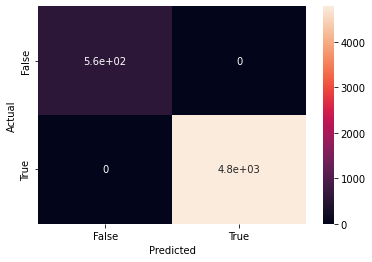

--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[ 267    0]
 [   0 2364]]


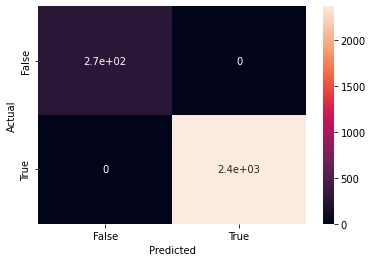

Media de cross_validation 1.0


In [52]:
model_best = grid_search.best_estimator_
evaluate_model(model_best,X,y,y_test,y_train,X_test,X_train)

In [53]:
# Inicializar nosso classificador
gnb = GaussianNB()
# Treinar nosso classificador
model = gnb.fit(X_train, y_train)
# Fazer previsões
preds = gnb.predict(X_test)

score = model.score(X_train,y_train)
print("Metrica del modelo", score)
 
scores=cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print("Media de cross_validation", scores.mean())


Metrica del modelo 1.0
Media de cross_validation 1.0


KNeighborsClassifier(leaf_size=1, n_neighbors=1)
KNeighborsClassifier(leaf_size=1, n_neighbors=1)
Train Accuracy : 1.0
Train Confusion Matrix:
[[ 561    0]
 [   0 4779]]


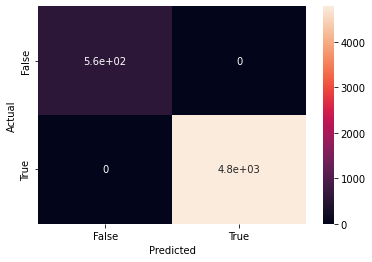

--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[ 267    0]
 [   0 2364]]


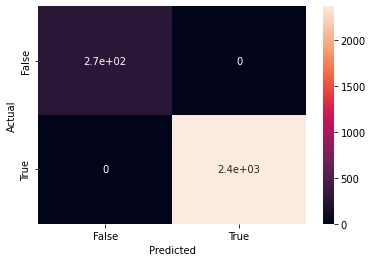

Media de cross_validation 1.0


In [54]:


parameters = dict(leaf_size= list(range(1,50)), n_neighbors=list(range(1,30)), p=[1,2])

knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(knn_classifier, parameters, cv=10)

best_model = grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)

kmodel_best = grid_search.best_estimator_

print(kmodel_best)

evaluate_model(model_best,X,y,y_test,y_train,X_test,X_train)


Estandarizamos los valores para mejorar la predicion Ejercicio 2

In [55]:
sc = StandardScaler()
X_std = sc.fit_transform(X)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.937 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.941 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.946 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

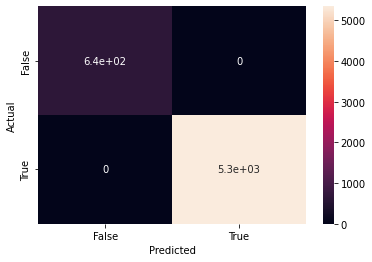

--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[ 192    0]
 [   0 1801]]


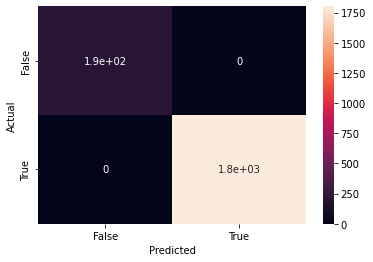

Media de cross_validation 1.0


In [56]:

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state = 0)
 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

model = SVC()
 
grid_search = GridSearchCV(model, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
kmodel_best = grid_search.best_estimator_

evaluate_model(model_best,X,y,y_test,y_train,X_test,X_train)



Text(0, 0.5, 'Number of Observations')

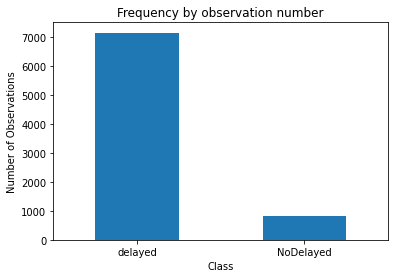

In [57]:
count_classes = pd.value_counts(df['Delayed'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['delayed', 'NoDelayed'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

Estrategia: Combinamos resampling con Smote-Tomek

In [58]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X=df.drop(['Delayed'],axis=1) 
y=df['Delayed']
model=RandomForestClassifier(criterion='entropy')
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Distribution before resampling Counter({True: 7114, False: 855})
Distribution labels after resampling Counter({True: 7114, False: 7114})
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.891 total time=   2.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.891 total time=   2.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.891 total time=   2.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.891 total time=   2.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.891 total time=   2.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  15.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  17.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  28.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  18.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time= 

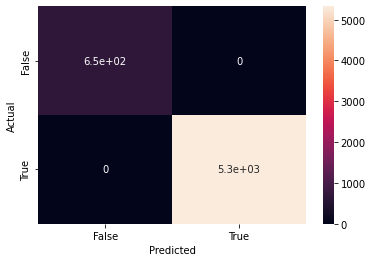

--------------------------------------------------
Test Accuracy : 0.9994982438534872
Test Confusion Matrix:
[[ 205    0]
 [   1 1787]]


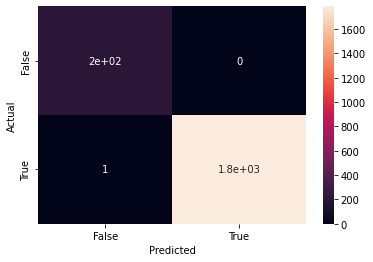

Media de cross_validation 0.99967330542561


In [20]:
ros = RandomOverSampler(random_state=42)

X_res, y_res = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print ("Distribution before resampling {}".format(Counter(y)))
print ("Distribution labels after resampling {}".format(Counter(y_res)))



# defining parameter range
param_grid = {'C': [0.1],
              'gamma': [1],
              'kernel': ['rbf','linear']}

model = SVC()
 
grid_search = GridSearchCV(model, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
model_best = grid_search.best_estimator_

evaluate_model(model_best,X,y,y_test,y_train,X_test,X_train)


## Nivell 3


### Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [21]:
X=df.drop(['Delayed'],axis=1) 
y=df['Delayed']
X.drop(['DepDelay'],axis=1, inplace=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.9s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.9s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.0s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=225;, score=1.000 total time=   1.1s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=225;, score=1.00

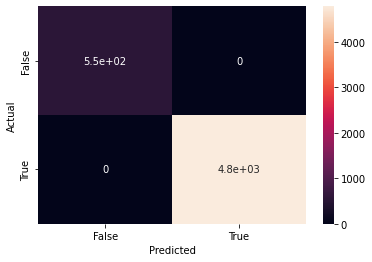

--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[ 272    0]
 [   0 2356]]


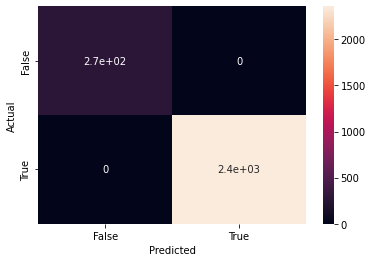

Media de cross_validation 1.0


In [29]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 250, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

model=RandomForestClassifier(criterion='entropy')

grid_search = GridSearchCV(model, random_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_search.fit(X_train, y_train)


model_best = grid_search.best_estimator_

evaluate_model(model_best,X,y,y_test,y_train,X_test,X_train)